In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#testing images
ford_test = cv2.imread("ford_test.jpeg")
volks_test = cv2.imread("volks_test.jpeg")

#training images
ford_train1 = cv2.imread("ford_train1.jpeg")
ford_train2 = cv2.imread("ford_train2.jpeg")
ford_train3 = cv2.imread("ford_train3.jpeg")
ford_train4 = cv2.imread("ford_train4.png")
ford_train5 = cv2.imread("ford_train5.jpeg")

volks_train1 = cv2.imread("volks_train1.png")
volks_train2 = cv2.imread("volks_train2.jpeg")
volks_train3 = cv2.imread("volks_train3.jpeg")
volks_train4 = cv2.imread("volks_train4.jpeg")
volks_train5 = cv2.imread("volks_train5.jpeg")

def HoG_features(images, cell_size=(4, 4), block_size=(4, 4), nbins=8):
    
    features = []
    for img in images:
        h, w, _ = img.shape
        c_h, c_w = cell_size
        b_h, b_w = block_size
        
        # create HoG Object
        hog = cv2.HOGDescriptor(_winSize=(w // c_w * c_w, h // c_h * c_h),
                                _blockSize=(b_w * b_w, b_h * b_h),
                                _blockStride=(c_w, c_h),
                                _cellSize=(c_w, c_h),
                                _nbins=nbins)

        n_cells = (h // c_h, w // c_w)

        hog_feats = hog.compute(img) \
                       .reshape(n_cells[1] - b_w + 1, n_cells[0] - b_h + 1, b_h, b_w, nbins) \
                       .transpose((1, 0, 2, 3, 4))  
        
        gradients = np.zeros((n_cells[0], n_cells[1], nbins)).astype(np.float)
        cell_count = np.zeros((n_cells[0], n_cells[1], 1)).astype(np.float)

        for off_y in range(b_h):
            for off_x in range(b_w):
                gradients[off_y:n_cells[0] - b_h + off_y + 1, 
                          off_x:n_cells[1] - b_w + off_x + 1] += hog_feats[:, :, off_y, off_x, :]
                cell_count[off_y:n_cells[0] - b_h + off_y + 1,
                           off_x:n_cells[1] - b_w + off_x + 1] += 1

        gradients /= cell_count

        features.append(gradients)
    return features


**CODING QUESTIONS TRAINING**

In [25]:
#1) Resize the training images to 128 x 128.

ford_train1 = cv2.resize(ford_train1, (128,128))
ford_train2 = cv2.resize(ford_train2, (128,128))
ford_train3 = cv2.resize(ford_train3, (128,128))
ford_train4 = cv2.resize(ford_train4, (128,128))
ford_train5 = cv2.resize(ford_train5, (128,128))

ford_train_list = [ford_train1,ford_train2, ford_train3, ford_train4, ford_train5]

volks_train1 = cv2.resize(volks_train1, (128,128))
volks_train2 = cv2.resize(volks_train2, (128,128))
volks_train3 = cv2.resize(volks_train3, (128,128))
volks_train4 = cv2.resize(volks_train4, (128,128))
volks_train5 = cv2.resize(volks_train5, (128,128))

volks_train_list = [volks_train1, volks_train2, volks_train3, volks_train4, volks_train5]
    


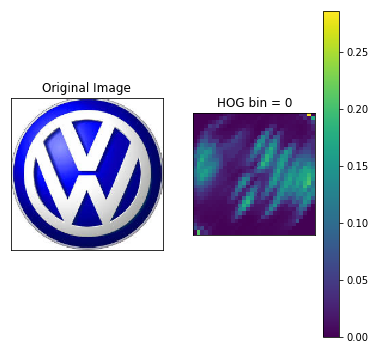

In [26]:
#2) Computer HoG features of size (32,32,8). Apply blocknorm in 4x4 cell neighborhood. (Deduce values of other required variables)

ford_features = HoG_features(ford_train_list)
volks_features = HoG_features(volks_train_list)

# test the feature extraction for one image 
test = volks_train_list[1]
gradients = volks_features[1]

# Preview
plt.figure(figsize = (6,6))
plt.subplot(121)
plt.imshow(test, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.pcolor(gradients[:, :, 0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("HOG bin = 0"), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

In [4]:
#3) Fit a nearest neighbor classifier with three neighbors. Use KNeigborsClassifier from sklearn library.

from sklearn.neighbors import KNeighborsClassifier

**CODING QUESTIONS TESTING**

In [5]:
#1) Resize test images to 128 x 128.

In [6]:
#2) Compute HoG features similar to what was done during training.

In [7]:
#3) Display the features for both test images.

In [8]:
#4) Classify the test images using the classifier built above.

**REASONING QUESTIONS**

_1. Will HoG work if images of logos undergo random rotation? If yes, which proprety of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform orientation of the logos._

Histogram of Gradients is orientation dependent, hence an image that was randomly rotated would not produce good results. Using homography and feature detection techniques like SIFT or SURF, it is possible to warp the image to regain a uniform orientation.

_2. Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn. How many and which directions of the gradient are sufficient in order to correctly classify the images into three categories?_